# ENCUESTA NACIONAL DE EMPLEO - ENE
## Analisis trimestral  - 2018 - 01


### DataSet
http://www.ine.cl/estadisticas/laborales/ene/base-de-datos
- Original data on SPSS (.SAV) format converted to .CSV using "R"

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
!ls *.csv

ENE_2018_01_DEF.csv ENE_2018_02_EFM.csv ENE_2018_03_FMA.csv ENE_2018_04_MAM.csv


In [4]:
# Load dataset
df = pd.read_csv('ENE_2018_04_MAM.csv', error_bad_lines=False, warn_bad_lines=False)
df.shape # (86147, 137)

(86147, 137)

In [5]:
df.head()

,id_directorio,id_identificacion,region,r_p_c,ano_trimestre,mes_central,ano_encuesta,mes_encuesta,estrato,tipo,...,cae_general,cae_especifico,categoria_ocupacion,habituales,efectivas,cine,fact,r_p_rev4cl_caenes,sector,ocup_form
1,21950,186414,Valparaíso,Viña del Mar,2018,Marzo-Mayo,2018,Marzo,5111,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de estudio (Habitual),No corresponde,NaN,NaN,Educación secundaria,887.678,NaN,0,0
4,21950,186414,Valparaíso,Viña del Mar,2018,Marzo-Mayo,2018,Marzo,5111,CD,...,Inactivos que no buscaron trabajo ni estuviero...,Razones de estudio (Habitual),No corresponde,NaN,NaN,Educación secundaria,887.678,NaN,0,0
7,6596,202112,Biobío,Quillón,2018,Marzo-Mayo,2018,Marzo,8039,Rural,...,Menor de quince años,Menor de quince años,No corresponde,NaN,NaN,Educación primaria (nivel 2),149.038,NaN,0,0
8,6596,202112,Biobío,Quillón,2018,Marzo-Mayo,2018,Marzo,8039,Rural,...,Menor de quince años,Menor de quince años,No corresponde,NaN,NaN,Nunca estudió,149.038,NaN,0,0
13,6596,202121,Biobío,Quillón,2018,Marzo-Mayo,2018,Marzo,8039,Rural,...,Menor de quince años,Menor de quince años,No corresponde,NaN,NaN,Educación preescolar,149.038,NaN,0,0


### Viewing dataset

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86147 entries, 1 to 102700
Data columns (total 137 columns):
id_directorio          int64
id_identificacion      int64
region                 object
r_p_c                  object
ano_trimestre          int64
mes_central            object
ano_encuesta           int64
mes_encuesta           object
estrato                int64
tipo                   object
hogar                  int64
nro_linea              int64
edad                   int64
parentesco             object
sexo                   object
curso                  object
nivel                  object
termino_nivel          object
est_conyugal           object
proveedor              object
nacionalidad           object
a1                     object
a2                     object
a3                     object
a4                     object
a5                     object
a6                     object
a6_otro                object
a7                     object
a8                     obje

In [7]:
for col in df:
    print ('\n', col)
    print (df[col].unique())


 id_directorio
[21950  6596 19117 ... 25447 22823 24172]

 id_identificacion
[186414 202112 202121 ... 267314 267315 267316]

 region
['Valparaíso' 'Biobío' 'La Araucanía' 'Coquimbo' 'Arica y Parinacota'
 'Los Ríos' 'O´Higgins' 'Los Lagos' 'Aysén' 'Atacama' 'Maule' 'Tarapacá'
 'Antofagasta' 'Metropolitana' 'Magallanes']

 r_p_c
['Viña del Mar' 'Quillón' 'Carahue' 'Coquimbo' 'Arica' 'La Unión'
 'Marchihue' 'Maullín' 'Olivar' 'Putaendo' 'Osorno' 'Victoria' 'Quellón'
 'San Pablo' 'Río Hurtado' 'Lago Verde' 'Río Bueno' 'Copiapó' 'Vicuña'
 'Ovalle' 'Ancud' 'San Esteban' 'Palmilla' 'Longaví' 'Illapel' 'La Serena'
 'Paredones' 'Loncoche' 'Cañete' 'Quillota' 'Las Cabras' 'Cauquenes'
 'Punitaqui' 'Molina' 'Río Negro' 'Huasco' 'Santa Cruz' 'Sagrada Familia'
 'Villarrica' 'Los Andes' 'Purranque' 'Cisnes' 'San Fernando' 'Salamanca'
 'Requínoa' 'Chanco' 'Navidad' 'Nueva Imperial' 'San Javier' 'Iquique'
 'Antofagasta' 'San Juan de la Costa' 'Paiguano' 'Alto del Carmen'
 'Canela' 'Monte Patria' 'Lit


 b18_varias
[nan '1993' '2018' '2016' '2001' 'Región de Coquimbo' 'La Serena' '2014'
 'Región de Valparaiso' '2015' 'Región del Bio Bío' '2017' '2010' '2013'
 '2012' 'La Ligua' 'Quintero' 'Región del Maule' 'Curicó' '1986' '2008'
 '1999' '2000' '1983' "Región del Libertador Gral Bernardo O'higgins"
 'Santa Cruz' 'Coyhaique' 'Pozo Almonte' '2007' '2006' 'Carahue'
 'Los Vilos' 'Región de los Lagos' '2011' '2009' 'Rancagua' '1997' '1998'
 '1960' 'Región de Atacama' 'Región de Tarapacá' 'San Javier' '2002'
 'Combarbalá' 'Puerto Montt' 'Ovalle' 'Florida' 'Conchalí' 'Puerto Varas'
 'Curacautín' '1996' 'Región de La Araucanía' '2004' '1995' 'Cauquenes'
 'Canela' '1977' '2003' 'Región Metropolitana'
 'Región de Magallanes y Antártica Chilena' 'Coquimbo'
 'Región de los Ríos' 'Osorno' 'Lanco' '1979' 'Lebu'
 'Región De Aisén del Gral. Carlos Ibañez del Campo' 'Los Lagos'
 'Lonquimay' 'San Clemente' 'Longaví' 'La Granja' 'Peñaflor' 'Pirque'
 'Lampa' 'Castro' '1989' 'Calbuco' 'Marchihue' 'Arica'


### DataSet general overview:
- Columns up to "nacionalidad" are social-economic data regarding samples
- Columns from 'a_n' to 'e_n' are data collect from questionary's answers
- Column "cae_general" seems to be the "conclusion" regarding why a person is not ocupied

In [8]:
df.cae_general.value_counts()

Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar                                                                                                                                                                                          21080
Menor de quince años                                                                                                                                                                                                                                               19704
                                                                                                                                                                                                                                                                    5270
 faena                                                                                                                                                                                                       

In [11]:
df.region.value_counts()
# 15 regions

Metropolitana         22090
Valparaíso            11963
Biobío                11921
Maule                  5025
Los Lagos              4907
Coquimbo               4640
O´Higgins              4564
La Araucanía           4365
Arica y Parinacota     3025
Antofagasta            2969
Tarapacá               2956
Atacama                2537
Los Ríos               2276
Aysén                  1769
Magallanes             1140
Name: region, dtype: int64

In [12]:
df.r_p_c.value_counts().head()
# 276 cities

Arica           3022
San Bernardo    1860
Concepción      1788
Puente Alto     1780
Iquique         1746
Name: r_p_c, dtype: int64

In [14]:
df.mes_encuesta.value_counts()

Mayo     29178
Abril    28848
Marzo    28121
Name: mes_encuesta, dtype: int64

### Numerical Analysis

In [33]:
POP = len(df.edad)
print ("Total Population:", POP, '\n')

Total Population: 86147 



In [63]:
df.edad.describe()

count    86147.000000
mean        36.686130
std         23.801032
min          0.000000
25%         16.000000
50%         34.000000
75%         56.000000
max        107.000000
Name: edad, dtype: float64

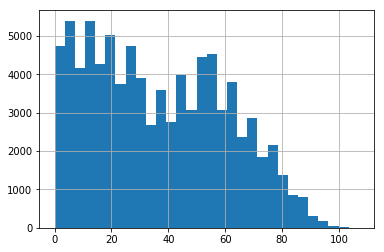

In [72]:
df.edad.hist(bins=30)

In [130]:
df_15 = df[df.edad >=15]
PET = len(df_15)
print ("Total Chilean Population over 15 years (PET):", PET, '\n')

Total Chilean Population over 15 years (PET): 66443 



In [131]:
print ("Pop potential over total: {}% \n".format(round(PET/POP, 2)*100))

Pop potential over total: 77.0% 



### Working with Questionary

<img src="Sit_Lab.png">

Main Questions:
- Question A1:  Did you work at least 1 hour last week?
- Question A2:  Did you make any deal that resulted as work?
- Question A3:  Will you make money with this work?
- Question A5:  Even if not worked, did yoy have any other paid activity?
- Question E1:  Did you try to get a work on the last 12 months?
- Question E2:  Did you try to get a work on the last 4 weeks?

In [143]:
df_ocupados = df_15[df_15.a1 == 'Sí']
df_ocupados.shape

(27666, 137)

In [154]:
df_ocupados = df_ocupados[df_ocupados.a3 == 'Sí']
df_ocupados.shape

(27405, 137)

In [160]:
df_not_ocup = df_15[df_15.a1 == 'No']
df_not_ocup.shape

(35616, 137)

In [161]:
df_not_ocup = df_not_ocup[df_not_ocup.a2 == 'No']
df_not_ocup.shape

(34827, 137)

In [162]:
df_ocup_aus = df_not_ocup[df_not_ocup.a5 == 'Sí']
df_ocup_aus.shape

(1640, 137)

In [144]:
r = 'Inactivos que no buscaron trabajo ni estuvieron disponibles para trabajar'
df_inativos = df_15[df_15.cae_general == r]
df_inativos.shape

(21080, 137)

In [145]:
r = 'Inactivos que estuvieron disponibles para trabajar'
df_desocupados = df_15[df_15.cae_general == r]
df_desocupados.shape

(2293, 137)

In [207]:
r = 'Cesante'
df_cesantes = df_15[df_15.cae_general == r]
df_cesantes.shape

(993, 137)

In [208]:
POP_OCUP = len(df_ocupados) + len(df_ocup_aus)
print ("Total Chilean Population over 15 years working:", POP_OCUP)

Total Chilean Population over 15 years working: 29045


In [209]:
POP_INAT = len(df_inativos) +len(df_cesantes)
print ("Total Chilean Population over 15 years Inactive :", POP_INAT)

Total Chilean Population over 15 years Inactive : 22073


In [210]:
PEA = PET - POP_INAT
print ("Total Chilean Population Economic active:", PEA)

Total Chilean Population Economic active: 44370


In [211]:
POP_DESOCUP = len(df_desocupados)
print ("Total Chilean Population over 15 years w/o job:", POP_DESOCUP)

Total Chilean Population over 15 years w/o job: 2293


In [213]:
TD = POP_DESOCUP/POP_OCUP
print ("Tasa de Desempleo: {}% \n".format(round(TD, 3)*100))

Tasa de Desempleo: 7.9% 



### Regional Analysis

In [203]:
df.region.value_counts()
# 15 regions

Metropolitana         22090
Valparaíso            11963
Biobío                11921
Maule                  5025
Los Lagos              4907
Coquimbo               4640
O´Higgins              4564
La Araucanía           4365
Arica y Parinacota     3025
Antofagasta            2969
Tarapacá               2956
Atacama                2537
Los Ríos               2276
Aysén                  1769
Magallanes             1140
Name: region, dtype: int64

In [216]:
REGION = 'Metropolitana'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Metropolitana

Regional Population over 15 years working: 8536
Regional Population over 15 years w/o job:  645
Tasa de Desempleo Regional:                7.6%


In [217]:
REGION = 'Atacama'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Atacama

Regional Population over 15 years working: 819
Regional Population over 15 years w/o job:  80
Tasa de Desempleo Regional:                9.8%


In [218]:
REGION = 'Los Lagos'

df_des_reg = df_desocupados[df_desocupados.region == REGION]
df_ces_reg = df_cesantes[df_cesantes.region == REGION]
df_ocup_reg = df_ocupados[df_ocupados.region == REGION]
df_ocup_aus_reg = df_ocup_aus[df_ocup_aus.region == REGION]

POP_OCUP_REG = len(df_ocup_reg) + len(df_ocup_aus_reg)
POP_DESOCUP_REG = len(df_des_reg) + len(df_ces_reg)
TD_REG = round(POP_DESOCUP_REG/POP_OCUP_REG, 3)*100

print ("Region:", REGION )
print ("\nRegional Population over 15 years working:", POP_OCUP_REG)
print ("Regional Population over 15 years w/o job: ", POP_DESOCUP_REG)
print ("Tasa de Desempleo Regional:                {}%".format(TD_REG))

Region: Los Lagos

Regional Population over 15 years working: 1584
Regional Population over 15 years w/o job:  75
Tasa de Desempleo Regional:                4.7%
